### Wine Quality Prediction

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
#Load the data
data=pd.read_csv(r"C:\Users\rjhcl\Desktop\wine quality data trained project\winequality-red.csv")

In [3]:
#Read the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Shape of the data
data.shape

(1599, 12)

In [5]:
#columns
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#Check any null values are present in the data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Get the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Describe
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory data analysis

In [9]:
missing_values=data.isnull().sum()
#sort the missing value
missing_values.sort_values(ascending=False,inplace=True)

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

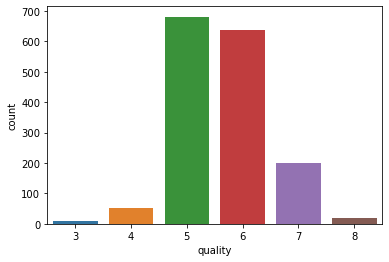

In [12]:
sns.countplot(data['quality'])

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

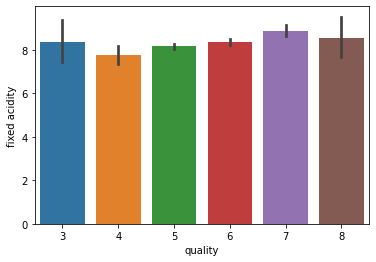

In [13]:
sns.barplot(x='quality',y='fixed acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

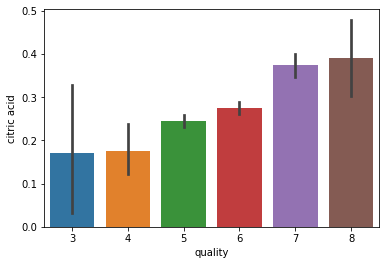

In [14]:
sns.barplot(x='quality',y='citric acid',data=data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

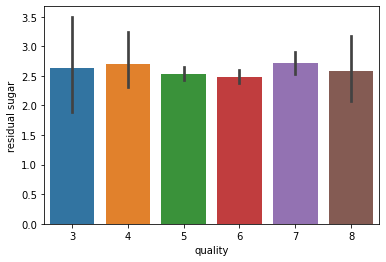

In [15]:
sns.barplot(x='quality',y='residual sugar',data=data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

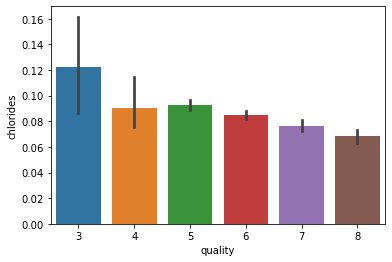

In [16]:
sns.barplot(x='quality',y='chlorides',data=data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

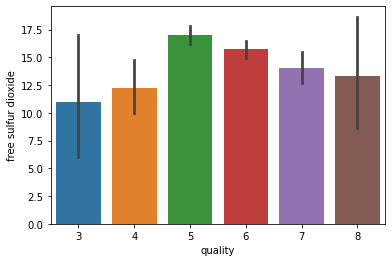

In [17]:
sns.barplot(x='quality',y='free sulfur dioxide',data=data)

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


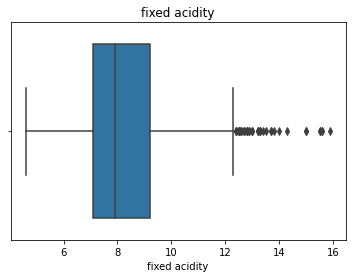

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


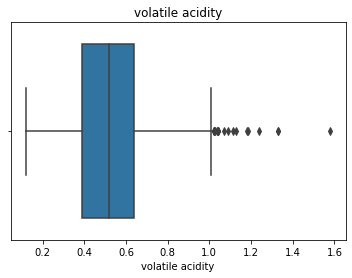

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


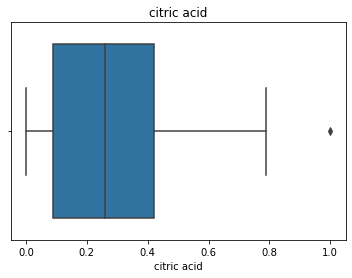

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


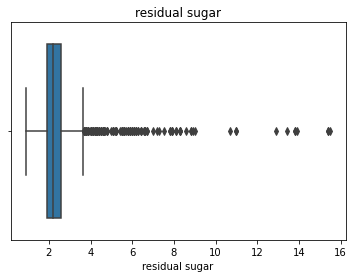

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


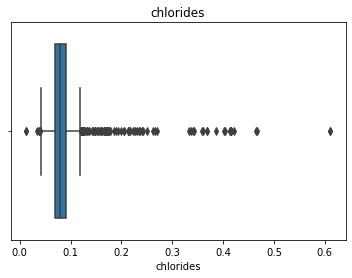

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


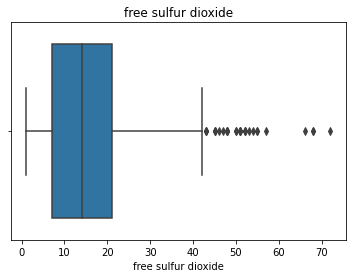

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


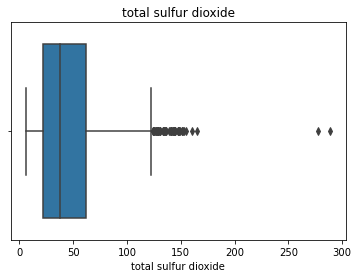

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


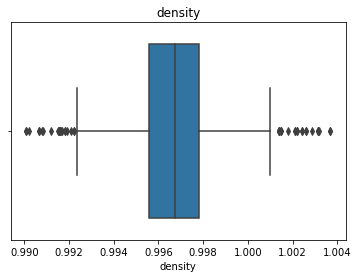

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


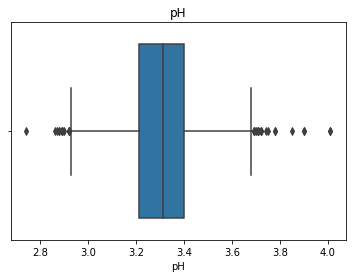

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


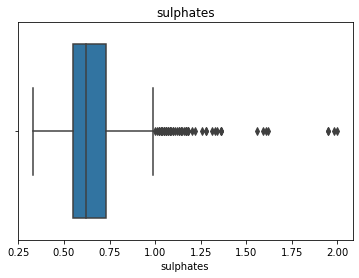

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


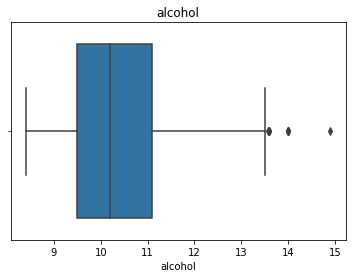

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


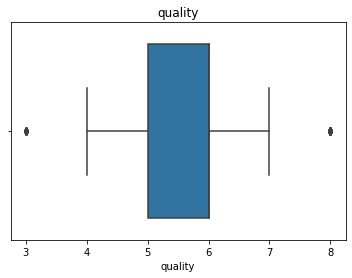

In [18]:
for feature in data.columns:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [19]:
#Dividing the wine quality by good and bad by limits
bins=(2,6.5,8)
labels=['Bad','Good']
data['quality']=pd.cut(data['quality'],labels=labels,bins=bins)

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

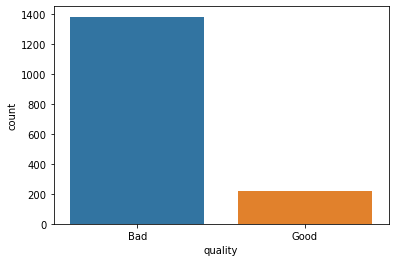

In [20]:
sns.countplot(data['quality'])

In [21]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['quality']=lc.fit_transform(data['quality'])
data['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [22]:
#Check data is balanced or not
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [23]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<AxesSubplot:>

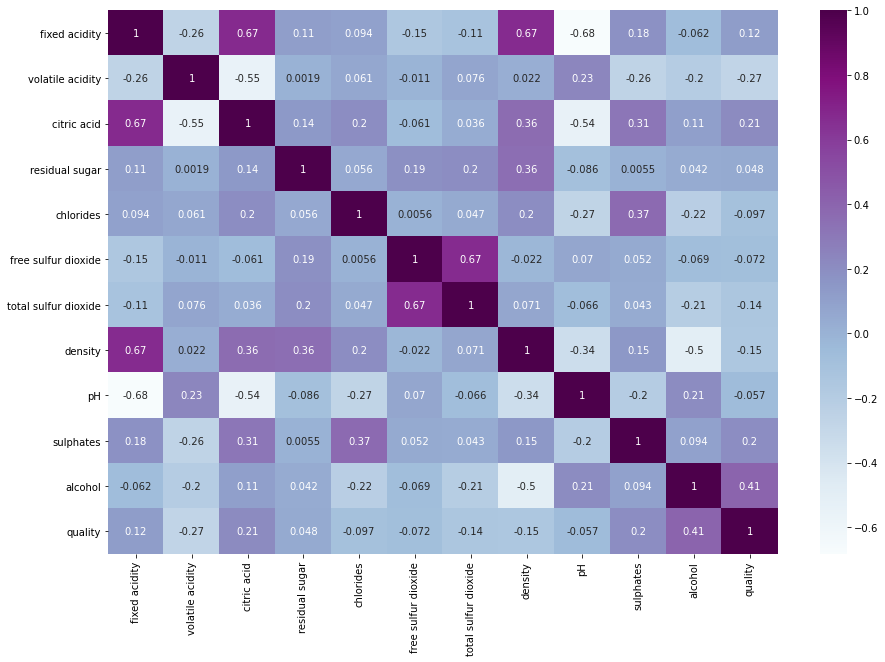

In [24]:
#correlation with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

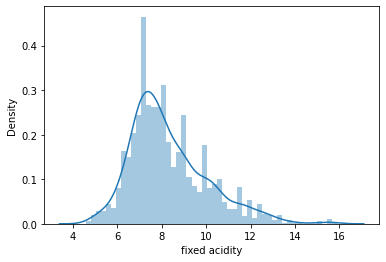

In [26]:
#Check features are normally distributed or not
sns.distplot(data['fixed acidity'],bins=50,hist=True)

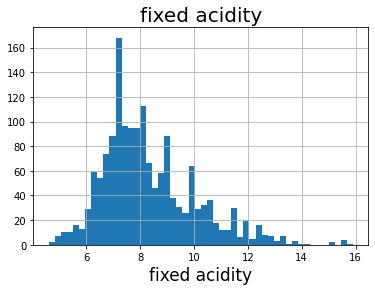

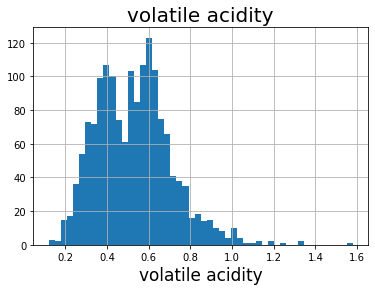

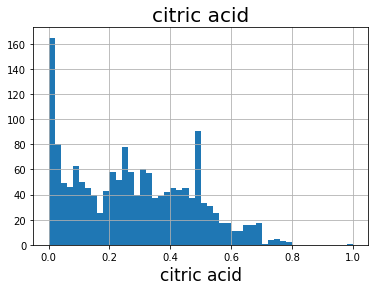

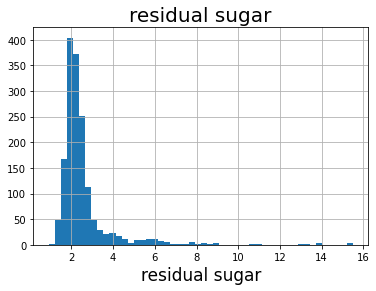

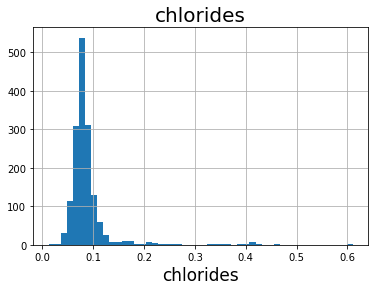

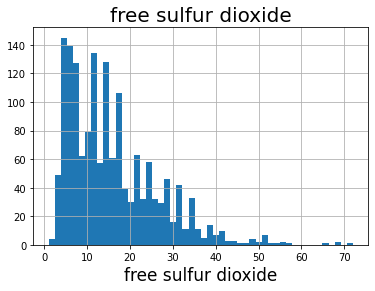

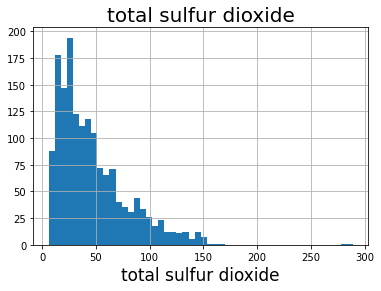

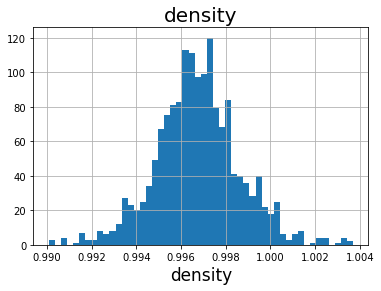

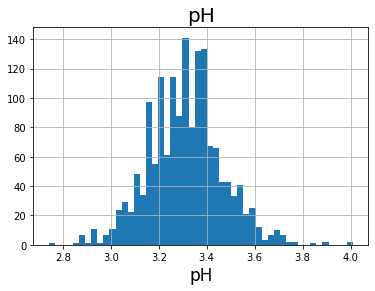

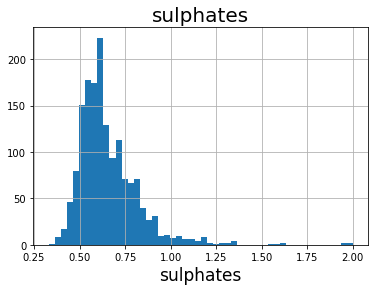

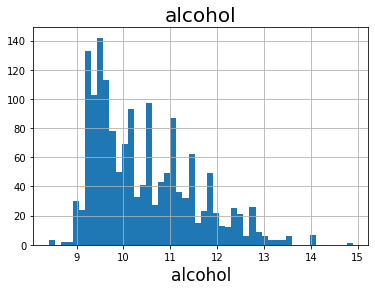

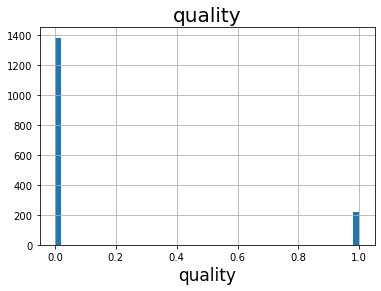

In [27]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature,fontsize=17)
    plt.title(feature,fontsize=20)
    plt.show()

from the above 'histogram' plots we can clearly observe that the some features are not normally distributed so we need to transform the variables in to standard distribution

Some Features are right skewed, we need to handle thos features.

### Feature Selection

In [28]:
#split the data in to x and y
x=data.iloc[:,:-1]
y=data['quality']

In [29]:
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select=SelectKBest(score_func=chi2,k=10)
select_feat=select.fit(x,y)

In [31]:
select_feat

SelectKBest(score_func=<function chi2 at 0x00000285A43DB040>)

In [32]:
select_data=pd.DataFrame(select_feat.scores_,columns=['Score'],index=x.columns)

In [33]:
select_data

,Score
fixed acidity,8.393096
volatile acidity,7.113769
citric acid,10.317077
residual sugar,2.856369
chlorides,0.383204
free sulfur dioxide,56.696032
total sulfur dioxide,724.343506
density,0.000129
pH,0.037747
sulphates,2.776190


In [34]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra_feat=extra.fit(x,y)

In [35]:
extra_feat.feature_importances_

array([0.0751066 , 0.10012483, 0.09271488, 0.07307971, 0.0699364 ,
       0.07013432, 0.08457541, 0.08746676, 0.06781962, 0.1100655 ,
       0.16897596])

In [36]:
ex_data=pd.Series(extra_feat.feature_importances_,index=x.columns)

<AxesSubplot:>

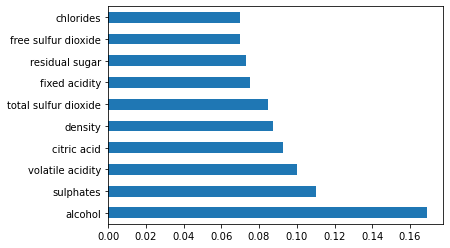

In [37]:
# this plot says that the percentage of alcohol makes the wine good
ex_data.nlargest(10).plot(kind='barh')

In [38]:
#Split the data in to train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

### Model selection

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

In [41]:
class Model_Selector():
    def __init__(self):
        print("Model Selector object created")
        
        
    def Classification_Model_Selector(self,df):
        seed = 42
        models = []
        models.append(("LR", LogisticRegression()))
        models.append(("RF", RandomForestClassifier(n_estimators=100,\
            random_state=42,max_depth=10)))
        models.append(("KNN", KNeighborsClassifier()))
        models.append(("CART", DecisionTreeClassifier()))
        models.append(("SVC",SVC()))
        result = []
        names = []
        scoring = 'accuracy'
        seed = 42
        
        

        for name, model in models:
            kfold = KFold(n_splits = 5, random_state =seed)
            cv_results = cross_val_score(model, x_train,\
                    y_train, cv = kfold, scoring = scoring)
            result.append(cv_results)
            names.append(name)
            msg = (name, cv_results.mean(), cv_results.std())
            print(msg)
            
            
            
        fig = plt.figure(figsize = (8,4))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(1,1,1)
        plt.boxplot(result)
        ax.set_xticklabels(names)
        plt.show()

In [42]:
model=Model_Selector()

Model Selector object created


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


('LR', 0.8827359068627452, 0.022845872501628794)


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


('RF', 0.9007291666666667, 0.03296484146131215)


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


('KNN', 0.872576593137255, 0.018640830825846676)


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


('CART', 0.8553707107843138, 0.023616355082622394)


C:\Users\rjhcl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


('SVC', 0.8889889705882353, 0.015661953490646245)


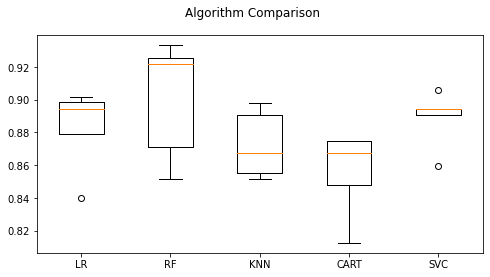

In [43]:
model.Classification_Model_Selector(data)

### HyperParameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost

In [45]:
#Parameters
params={"Learning_rate":[0.05,0.1,0.2,0.25,0.3,0.35],
       "max_depth":[3,4,5,6,8,9,10,12],
       "min_child_weight":[1,3,5,7,10],
       "colsample_bytree":[0.3,0.5,0.7,0.9]}

In [46]:
#intialize the classifier with xgboost
classifier=xgboost.XGBClassifier()

In [47]:
rf_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,cv=10,scoring='roc_auc',n_jobs=-1,verbose=3)

In [48]:
rf_model.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
C:\Users\rjhcl\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { Learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [49]:
rf_model.best_estimator_

XGBClassifier(Learning_rate=0.35, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [50]:
rf_model.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'colsample_bytree': 0.7,
 'Learning_rate': 0.35}

In [51]:
best_random=rf_model.best_estimator_
best_random

XGBClassifier(Learning_rate=0.35, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
random_pred=best_random.predict(x_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,random_pred))
print(classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))

0.878125
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0.88      0.87       320

[[262  11]
 [ 28  19]]


In [54]:
#Hyperparametre tuning With Randomforestclassifier
#Number of trees in the random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#Number of features to be considerd at every split
max_features=['auto','sqrt','log2']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]
#Number of samples required for split a node
min_samples_split=[2,5,10,14]
#Number of samples required at each leaf node
min_samples_leaf=[2,3,6,8,10]

random_grid={
    "n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "criterion":['entrophy','gini']
            }

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [2, 3, 6, 8, 10],
 'criterion': ['entrophy', 'gini']}

In [55]:
rf=RandomForestClassifier()
random_model=RandomizedSearchCV(rf,param_distributions=random_grid,cv=10,n_iter=100,verbose=3,n_jobs=-1,random_state=42)

In [56]:
random_model.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 10.9min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entrophy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=3)

In [57]:
random_model.best_estimator_

RandomForestClassifier(max_depth=890, min_samples_leaf=2, n_estimators=1200)

In [58]:
random_model.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'gini'}

In [59]:
random_pred1=random_model.best_estimator_
random_pred1

RandomForestClassifier(max_depth=890, min_samples_leaf=2, n_estimators=1200)

In [60]:
rand_pred=random_pred1.predict(x_test)

In [61]:
print(accuracy_score(y_test,rand_pred))
print(classification_report(y_test,rand_pred))
print(confusion_matrix(y_test,rand_pred))

0.88125
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.70      0.34      0.46        47

    accuracy                           0.88       320
   macro avg       0.80      0.66      0.70       320
weighted avg       0.87      0.88      0.86       320

[[266   7]
 [ 31  16]]
